# Fig. 8 - Effect of P->A synaptic facilitation

In the last simulation, we add a synaptic facilitation mechanism on the P->A connection. The facilitation is encoded by the variable `z`. Synaptic facilitation is the **only** short term plasticity mechanisms in this run, i.e. no B->P depression (set to 1.0), and no variable B->A depression (`e` treated as a constant parameter with $e=0.5$)

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from neurolib.models.multimodel import MultiModel

from hippocampus import HippocampalCA3Node

plt.style.use("default_light")

## Helper functions and constants
- `simulate_hc`: integrates the model with noise for a given time with synaptic facilitation on P->A connection

In [18]:
DT = 0.05
SAMPLING_DT = 0.1


def simulate_hc(duration=8, backend="numba"):
    hc = HippocampalCA3Node(constant_depression=True, syn_facilitation=True)
    m = MultiModel.init_node(hc)
    m.model_instance.initial_state = np.array([0.0, 0.0, 0.0125, 0.0])
    m.params["HCnode_0.aSWR-HC-NoDP_2.e"] = 0.5
    m.params["backend"] = backend
    m.params["duration"] = duration * 1e3
    m.params["dt"] = DT
    m.params["sampling_dt"] = SAMPLING_DT
    m.run()
    return m.xr()

## Simulate and plot

Run short (10 seconds) simulation with P->A facilitation and plot as phase space in three planes: `P`-`z`, `B`-`z`, and `A`-`z`

**!! Note !!**: you should see oscillations in the phase planes representing the SWR. However, since these are spontaneous, sometimes there is no oscillation (and noise is stochastic), hence you need to run the simulation couple of times (or set longer time) to get few oscillations to see the phase plane.

In [19]:
res = simulate_hc(duration=10, backend="numba")

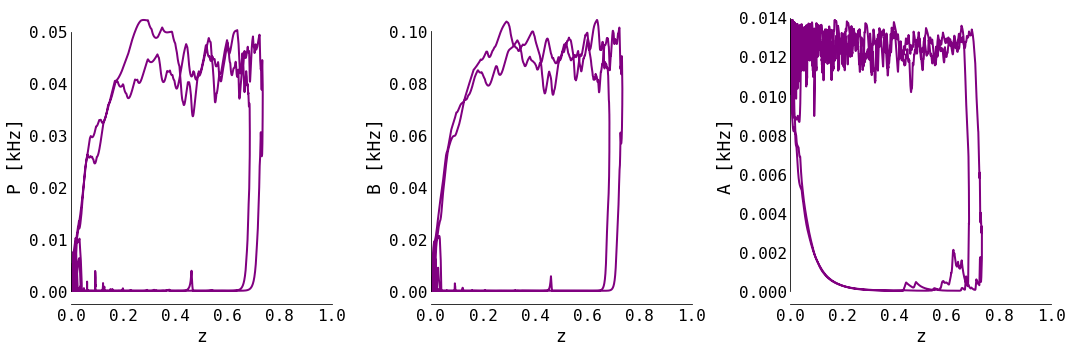

In [20]:
_, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15, 5))

axs[0].plot(
    res.sel({"output": "z_SynFac"}).T,
    res.sel({"output": "r_mean_EXC"}).T,
    color="purple",
)
axs[1].plot(
    res.sel({"output": "z_SynFac"}).T,
    res.sel({"output": "r_mean_INH"}).T,
    color="purple",
)
axs[2].plot(
    res.sel({"output": "z_SynFac"}).T,
    res.sel({"output": "r_mean_aSWR"}).T,
    color="purple",
)

axs[0].set_ylabel("P [kHz]")
axs[1].set_ylabel("B [kHz]")
axs[2].set_ylabel("A [kHz]")

for ax in axs:
    ax.set_xlabel("z")
    ax.set_xlim([0, 1.0])
    sns.despine(ax=ax, trim=True)

plt.tight_layout()

plt.savefig("../figs/p_a_facilitation.pdf", transparent=True, bbox_inches="tight")

## Repeat for `jitcdde` backend

In [29]:
res = simulate_hc(duration=20, backend="jitcdde")

/Users/nikola/.virtualenvs/paper_hc/lib/python3.7/site-packages/jitcdde/_jitcdde.py:1491: UserWarning: Your input past does not begin at t=0 but at t=0.1. Values before the beginning of the past will be extrapolated. You very likely do not want this.
  warn(f"Your input past does not begin at t=0 but at t={input[0].time}. Values before the beginning of the past will be extrapolated. You very likely do not want this.")


Using default integration parameters.


  0%|          | 0/200000 [00:00<?, ?it/s]/Users/nikola/.virtualenvs/paper_hc/lib/python3.7/site-packages/jitcdde/_jitcdde.py:791: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.
  warn("The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.")
100%|██████████| 200000/200000 [00:00<00:00, 2

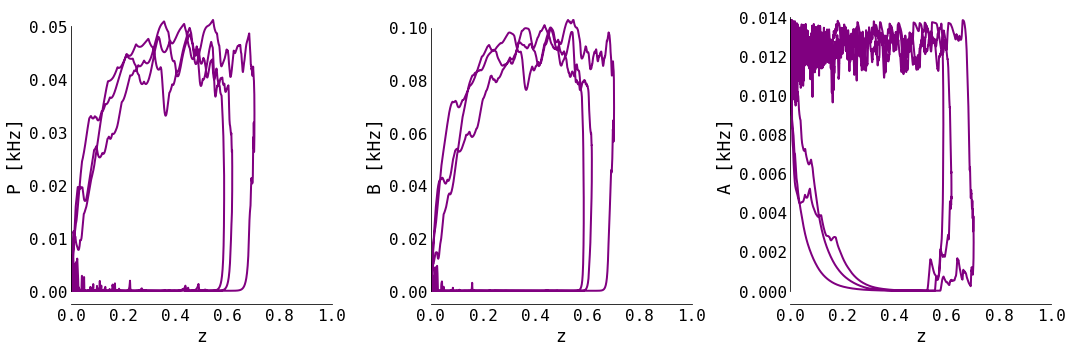

In [30]:
_, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(15, 5))

axs[0].plot(
    res.sel({"output": "z_SynFac"}).T,
    res.sel({"output": "r_mean_EXC"}).T,
    color="purple",
)
axs[1].plot(
    res.sel({"output": "z_SynFac"}).T,
    res.sel({"output": "r_mean_INH"}).T,
    color="purple",
)
axs[2].plot(
    res.sel({"output": "z_SynFac"}).T,
    res.sel({"output": "r_mean_aSWR"}).T,
    color="purple",
)

axs[0].set_ylabel("P [kHz]")
axs[1].set_ylabel("B [kHz]")
axs[2].set_ylabel("A [kHz]")

for ax in axs:
    ax.set_xlabel("z")
    ax.set_xlim([0, 1.0])
    sns.despine(ax=ax, trim=True)

plt.tight_layout()

## Profit

We got same figures. Naturally, since this is noisy simulation, the figures are not identical, but are qualitatively the same.

All good.